In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel(r'C:\Users\asus\Desktop\Tajrupt\data\bank_data.xlsx')

In [ ]:
'''q_low = df["col"].quantile(0.01)
q_hi  = df["col"].quantile(0.99)

df_filtered = df[(df["col"] < q_hi) & (df["col"] > q_low)]'''

In [2]:
data.loc[data['Дни просрочки']<30,'Дни просрочки']=0

In [3]:
data.loc[data['Дни просрочки']>=30,'Дни просрочки']=1

In [4]:
data['Пол'].replace({'Мужской':0,'Женский':1},inplace = True)

In [5]:
data['Количество членов семьи'].replace({'Нет инфо':np.NaN},inplace = True)

In [6]:
data.corr()['Дни просрочки']

KOD                                              -0.044352
Год рождения                                      0.020977
Пол                                              -0.023008
Количество членов семьи                          -0.048434
Сумма кредита                                     0.048331
Срок кредита                                      0.168178
Ежемесячная сумма погашения по графику            0.005436
Льготный период (месяц)                          -0.028931
Капитал                                           0.001406
Актив                                             0.004958
Обязательства                                     0.033221
Дни просрочки                                     1.000000
Максимальные дни просрочки                        0.518671
Количество просрочек                              0.754875
Этап кредитования (который раз получает кредит   -0.036045
Валовая прибыль                                   0.002692
Чистая прибыль                                    0.0008

In [7]:
data['Количество членов семьи'].isnull().sum()

14850

In [8]:
data['Количество членов семьи'].fillna(int(data['Количество членов семьи'].mean()),inplace = True)

In [9]:
data.isnull().sum()

KOD                                                                                                                                                    0
Дата рождения                                                                                                                                        181
Год рождения                                                                                                                                       49201
Семейное положение                                                                                                                                     0
Пол                                                                                                                                                    0
Национальность                                                                                                                                         0
Образование                                                                       

In [10]:
data['Количество членов семьи'] = data['Количество членов семьи'].astype('int64')

In [11]:
data.dropna(inplace = True)

In [12]:
data.isnull().sum()

KOD                                                                                                                                                0
Дата рождения                                                                                                                                      0
Год рождения                                                                                                                                       0
Семейное положение                                                                                                                                 0
Пол                                                                                                                                                0
Национальность                                                                                                                                     0
Образование                                                                                               

<AxesSubplot:>

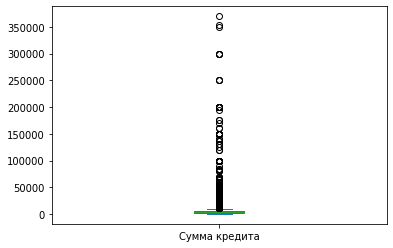

In [14]:
data['Сумма кредита'].plot(kind = 'box',showfliers = True)

In [22]:
q_low = data["Сумма кредита"].quantile(0.01)
q_hi  = data["Сумма кредита"].quantile(0.99)

data = data[(data["Сумма кредита"] < q_hi) & (data["Сумма кредита"] > q_low)]

<AxesSubplot:>

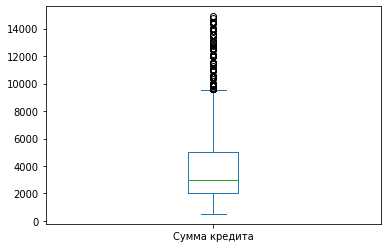

In [23]:
data['Сумма кредита'].plot(kind = 'box',showfliers = True)

In [24]:
data.drop(data[data['Валюта кредита']=='Рос.рубль'].index,inplace = True)

In [25]:
data['Валюта кредита'].replace({'Сомони':0,'Доллар США':1},inplace = True)

In [26]:
nonbinary = pd.get_dummies(data[['Семейное положение','Уровень клиента','Продукт']])

In [27]:
data = pd.concat((data,nonbinary),axis = 1)

In [28]:
data.drop(data[['Семейное положение','Уровень клиента','Продукт']],axis = 1,inplace = True)

In [29]:
data.index = range(data.shape[0])

In [30]:
for i in range(data['Дата рождения'].shape[0]):
    if type(data['Дата рождения'][i]) != str:
        data['Дата рождения'][i] = data['Дата рождения'][i].strftime('%Y')
    if len(data['Дата рождения'][i]) > 4:
        print(data['Дата рождения'][i])
        data.drop(data[data['Дата рождения']==data['Дата рождения'][i]].index)
    else:
        data['Дата рождения'][i] = 2021 - int(data['Дата рождения'][i])

C:\Users\asus\AppData\Local\Temp/ipykernel_2496/3862562187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Дата рождения'][i] = data['Дата рождения'][i].strftime('%Y')
C:\Users\asus\AppData\Local\Temp/ipykernel_2496/3862562187.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Дата рождения'][i] = 2021 - int(data['Дата рождения'][i])


11.11.1678
11.11.1678


In [31]:
data.drop(data[data['Дата рождения']=='11.11.1678'].index,inplace = True)

In [32]:
data.index = range(data.shape[0])

In [33]:
data.columns

Index(['KOD', 'Дата рождения', 'Год рождения', 'Пол', 'Национальность',
       'Образование', 'Количество членов семьи', 'Стаж в бизнесе (месяц)',
       'Филиал', 'Регион офиса', 'Навпреление деятельности', 'Сектор',
       'Дата выдачи', 'Валюта кредита', 'Сумма кредита', 'Срок кредита',
       'Дата окончания по графику', 'Ежемесячная сумма погашения по графику',
       'Льготный период (месяц)',
       'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)',
       'Капитал', 'Актив', 'Обязательства', 'Дни просрочки',
       'Максимальные дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Семейное положение_Бевамард (бевазан)',
       'Семейное положение_Беоила', 'Семейное положение_Оиладор',
       'Семейное положение_Чудошуда', 'Уровень клиента_VIP',
       'Уровень клиента_Бовари', 'Уровень клиента_Ха

In [124]:
# год рождение, семейное положение, количество членов семьи,уровень клиента,продукт,валюта,сумма кредита,срок кредита

In [34]:
x = data[['Дата рождения','Семейное положение_Беоила','Семейное положение_Оиладор','Семейное положение_Чудошуда',
          'Количество членов семьи','Уровень клиента_VIP','Уровень клиента_Бовари','Уровень клиента_Хамкори',
          'Уровень клиента_Шарик','Продукт_Кредит на пред+A21:N21принимательскую деятельность',
          'Продукт_Кредит на предпринимательскую деятельность','Продукт_Потребительский кредит',
          'Продукт_Энергосберегающие технологии','Валюта кредита', 'Сумма кредита', 'Срок кредита']]
y = data['Дни просрочки']

In [35]:
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [36]:
random_s = []
accuracy = []

In [37]:
for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    model = RandomForestClassifier(random_state=42).fit(x_train,y_train)
    y_pred = model.predict(x_test)
    random_s.append(i)
    accuracy.append(accuracy_score(y_pred,y_test))

In [38]:
score = {'random_state':random_s,
     'accuracy':accuracy}

In [39]:
for i,j in zip(score['random_state'],score['accuracy']):
    if j == max(score['accuracy']):
        print(i,j)

44 0.8977446901686008


In [44]:
params = {
    'n_estimators': range (10, 51, 10),
    'max_depth': range (1,13, 2),
    'min_samples_leaf': range (1,8),
    'min_samples_split': range (2,10,2) 
}

In [46]:
grid = GridSearchCV(model,params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [50]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 50}

In [59]:
model = RandomForestClassifier(max_depth=50,n_estimators=50,min_samples_leaf=5,min_samples_split=4,random_state=42).fit(x_train,y_train)

In [60]:
y_pred = model.predict(x_test)

In [61]:
accuracy_score(y_pred,y_test)

0.9156995839719728

In [62]:
model.score(x_test,y_test)

0.9156995839719728

In [136]:
models = {'model':[RandomForestClassifier(max_depth=50),KNeighborsClassifier(n_neighbors=5),LogisticRegression(),SVC()],
         'name':['RandomForestClassifier','KNeighborsClassifier','LogisticRegression','SVC']}

In [140]:
def best_model(x,y,models):
    random_s = []
    accuracy = []
    name_model = []
    for i in range(1,50):
        x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=i)
        for model,name in zip(models['model'],models['name']):
            model.fit(x_train,y_train)
            y_pred = model.predict(x_test)
            random_s.append(i)
            accuracy.append(float(str(accuracy_score(y_pred,y_test))[:5]))
            name_model.append(name)
    score = {'random_state':random_s,
     'accuracy':accuracy,
     'model':name_model}
    for i,j,z in zip(score['random_state'],score['accuracy'],score['model']):
        if j == max(score['accuracy']):
            print(f'random_state:{i},accuracy:{j*100}%,model:{z}')

In [142]:
best_model(x,y,models)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

33 0.921 LogisticRegression
33 0.921 SVC


7.0